In [53]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from datetime import datetime

In [54]:
np.random.seed(42)

In [55]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [56]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [57]:
input_layer = Input(shape=(784,))   # 28*28
## encoding architecture
encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)
encode_layer3 = Dense(32, activation='relu')(encode_layer2)

## decoding architecture
decode_layer1 = Dense(64, activation='relu')(encode_layer3)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)
decode_layer3 = Dense(784, activation='relu')(decode_layer2)

# reconstruction model:
autoencoder = keras.Model(input_layer, decode_layer3)

# encoder model:
encoder = keras.Model(input_layer, encode_layer3)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]  # decoder layers of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [58]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 5s 141ms/step - loss: 1.3743 - val_loss: 0.8901
Epoch 2/30
24/24 [==============================] - 4s 179ms/step - loss: 0.8314 - val_loss: 0.8100
Epoch 3/30
24/24 [==============================] - 3s 138ms/step - loss: 0.7871 - val_loss: 0.7546
Epoch 4/30
24/24 [==============================] - 3s 121ms/step - loss: 0.6977 - val_loss: 0.6496
Epoch 5/30
24/24 [==============================] - 3s 116ms/step - loss: 0.6287 - val_loss: 0.6156
Epoch 6/30
24/24 [==============================] - 3s 116ms/step - loss: 0.6108 - val_loss: 0.6063
Epoch 7/30
24/24 [==============================] - 3s 124ms/step - loss: 0.5937 - val_loss: 0.5870
Epoch 8/30
24/24 [==============================] - 3s 123ms/step - loss: 0.5797 - val_loss: 0.5782
Epoch 9/30
24/24 [==============================] - 3s 129ms/step - loss: 0.5647 - val_loss: 0.5640
Epoch 10/30
24/24 [==============================] - 3s 125ms/step - loss: 0.5740 - val_loss: 0.5584

In [59]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

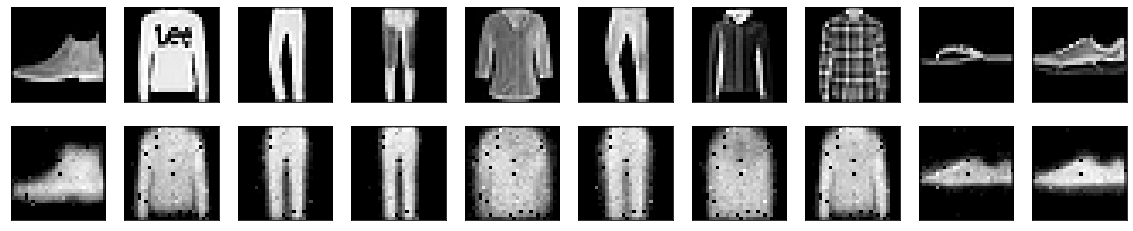

In [60]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [61]:
encoder.summary()


Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [62]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [63]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

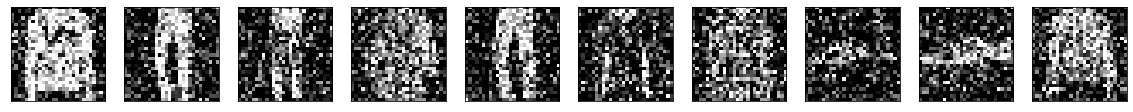

In [64]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [65]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [66]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 91s 4s/step - loss: 0.5777 - val_loss: 0.4215
Epoch 2/30
24/24 [==============================] - 84s 3s/step - loss: 0.3682 - val_loss: 0.3364
Epoch 3/30
24/24 [==============================] - 84s 3s/step - loss: 0.3293 - val_loss: 0.3232
Epoch 4/30
24/24 [==============================] - 83s 3s/step - loss: 0.3199 - val_loss: 0.3163
Epoch 5/30
24/24 [==============================] - 84s 4s/step - loss: 0.3143 - val_loss: 0.3117
Epoch 6/30
24/24 [==============================] - 81s 3s/step - loss: 0.3103 - val_loss: 0.3092
Epoch 7/30
24/24 [==============================] - 83s 3s/step - loss: 0.3075 - val_loss: 0.3058
Epoch 8/30
24/24 [==============================] - 83s 3s/step - loss: 0.3051 - val_loss: 0.3041
Epoch 9/30
24/24 [==============================] - 82s 3s/step - loss: 0.3036 - val_loss: 0.3026
Epoch 10/30
24/24 [==============================] - 83s 3s/step - loss: 0.3020 - val_loss: 0.3012
Epoch 11/30
24/24 [

In [67]:
autoencoder.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0  

In [68]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show(

SyntaxError: unexpected EOF while parsing (<ipython-input-68-9bb9e6733f95>, line 19)